Assignment 2

Build a SVM Classifier for Linear and Non-linear Data

Apply the following machine learning algorithms on a dataset obtained from UCI ML repository. 

a. Support Vector Machine 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SVM Classifier for Linear Data

In [ ]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Since the SVM algorithm, is a distance based classification algorithm, we must try different approaches such as

1. Scaling the data
2. Without scaling the data

to evaluate the models performance

In [ ]:
X = dataset.iloc[:, 1: -1]
Y = dataset.iloc[:, -1]

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
# Split the arrays into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# For the data into the model

from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
# Evaluate the predictions

predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(predictions, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(predictions, y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Using the SVM Classifier for non-linear data

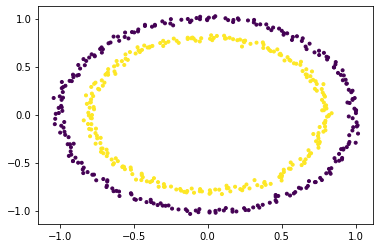

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# generating data
X, Y = make_circles(n_samples = 500, noise = 0.02)

# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()

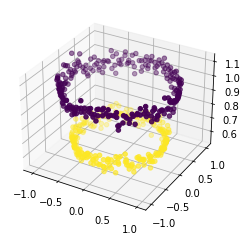

In [ ]:
# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)
X = np.hstack((X, X3))

# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
plt.show()


<ipython-input-25-ddb1a9c84329>:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes1 = fig.gca(projection = '3d')


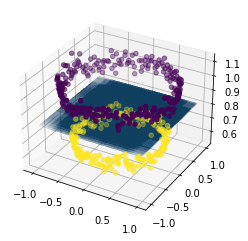

In [ ]:
# create support vector classifier using a linear kernel
from sklearn import svm

svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_

# plotting the separating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]

fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()